In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


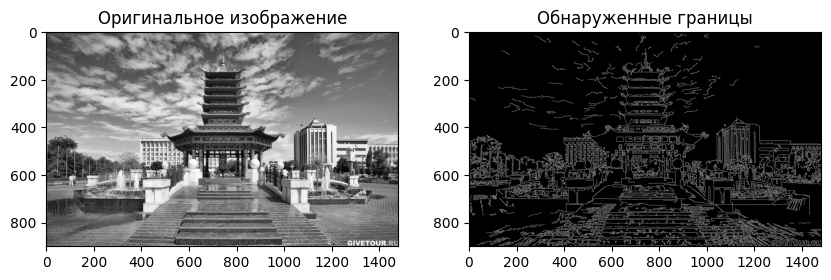

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/pic1.jpg', cv2.IMREAD_GRAYSCALE)

# Применение гауссового фильтра для снижения шумов
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Применение Канни Эдж Детектора
edges = cv2.Canny(blurred_image, 50, 150)
# 50 и 150 - это  high threshold и low threshold —
# два пороговых значения, которые используются
# для определения сильных и слабых границ на изображении.

# Отображение результата
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Обнаруженные границы')
plt.imshow(edges, cmap='gray')

plt.show()

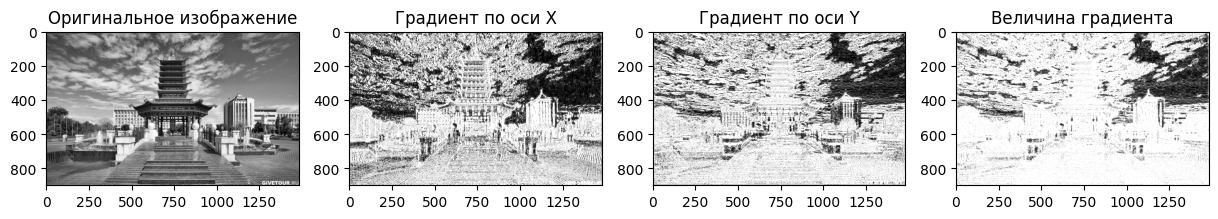

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/pic1.jpg', cv2.IMREAD_GRAYSCALE)

# Применение оператора Собеля для вычисления градиентов по осям X и Y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Градиент по оси X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Градиент по оси Y

# Вычисление величины градиента
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Нормализация градиентов для отображения
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# Отображение результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Градиент по оси X')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Градиент по оси Y')
plt.imshow(sobel_y, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Величина градиента')
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()

1. Объясните этапы работы Канни Эдж Детектора. Почему каждый этап важен для общего алгоритма?

Перед применением детектора изображение переводиться в изображение оттенков серого , для уменьшения вычислительных затрат, т.к. нам важна интенсивность (яркость) пикселей, а не цветопередача.

2. Как выбор значений для двойного порога (high и low threshold) влияет на результаты работы Канни Эдж Детектора?

Чем ниже значение нижнего порога тем больше слабых границ попадает в исходное изображение и на изображении будет больше шумовых границ, верхний порог добавляет большее количество границ для связывания и уменьшает количество сильных границ к которым пойдет привязка слабых, соответственно часть слабых границ не смогут быть привязаны к сильным и подавятся.

3. Поэксперементируйте с примером кода и опишите свои наблюдения.
*Используйте Канни Эдж Детектор для различных изображений и сравните результаты. *

Чем выше контрастность изображения, тем четче получаются на выходном изображении границы, тем меньше получается шумовых границ, которые при контрасном изображении подавляются.

4. Используйте приведенный ниже код для визуализации градиентов в изображении. Подумайте: как можно использовать эти градиенты для других задач в компьютерном зрении?

Использовать градиентное преобразование можно в областях анализа и слежения, где отслеживать изменение градиента последовательных изображений, поскольку изменение яркости и контрастности двух изображений можно подчинить какой-то функции и 3D- визуализация и реконструкция, т.к. можно последовательно применять матрицы градиентов и их преобразования и создать векторную модель поверхности объекта.